# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [2]:
import pandas as pd

# load the data
data = pd.read_csv('cars_hw.csv')

data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


(None,
    Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
 0           1  Volkswagen       2017  silver      sedan        44611   
 1           2     Hyundai       2016     red  crossover        20305   
 2           3       Honda       2019   white        suv        29540   
 3           4     Renault       2017  bronze  hatchback        35680   
 4           5     Hyundai       2017  orange  hatchback        25126   
 
   No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
 0          1st                 5    diesel      7-Speed         Automatic   
 1          1st                 5    petrol      5-Speed            Manual   
 2          2nd                 5    petrol      5-Speed            Manual   
 3          1st                 5    petrol      5-Speed            Manual   
 4          1st                 5    petrol      5-Speed            Manual   
 
     Price  
 0  657000  
 1  682000  
 2  793000  
 3  414000  
 4  515000  )

In [ ]:
'''
Dataset contains 976 entries and 12 columns. Columns like Make, 
Color, Body_Type, Fuel_Type, Transmission, and Transmission_Type
are categorical and likely need transformation for regression 
analysis. Price is the target variable. Unnamed appears to just
be an index column? I will drop it.
'''

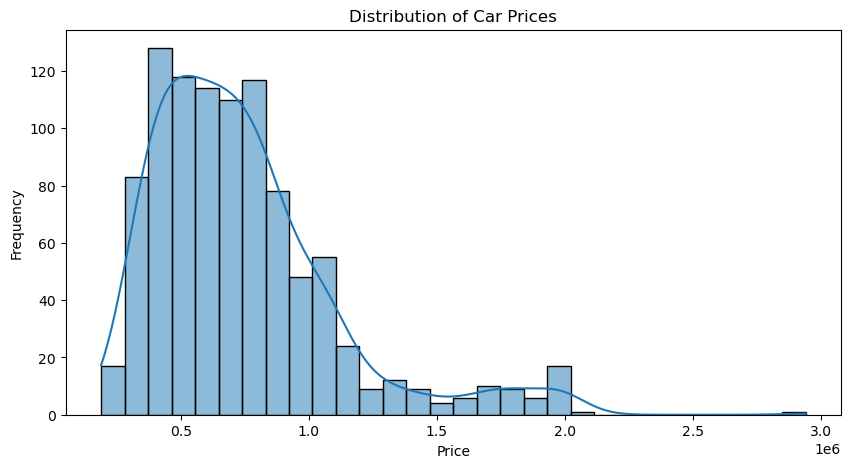

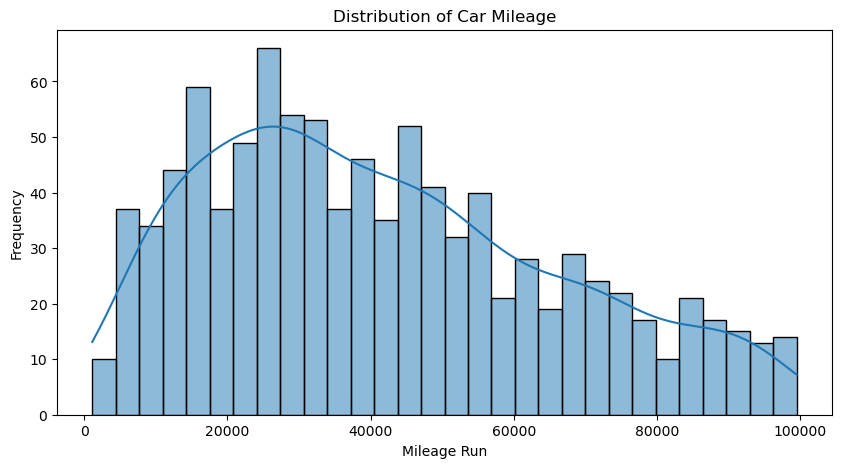

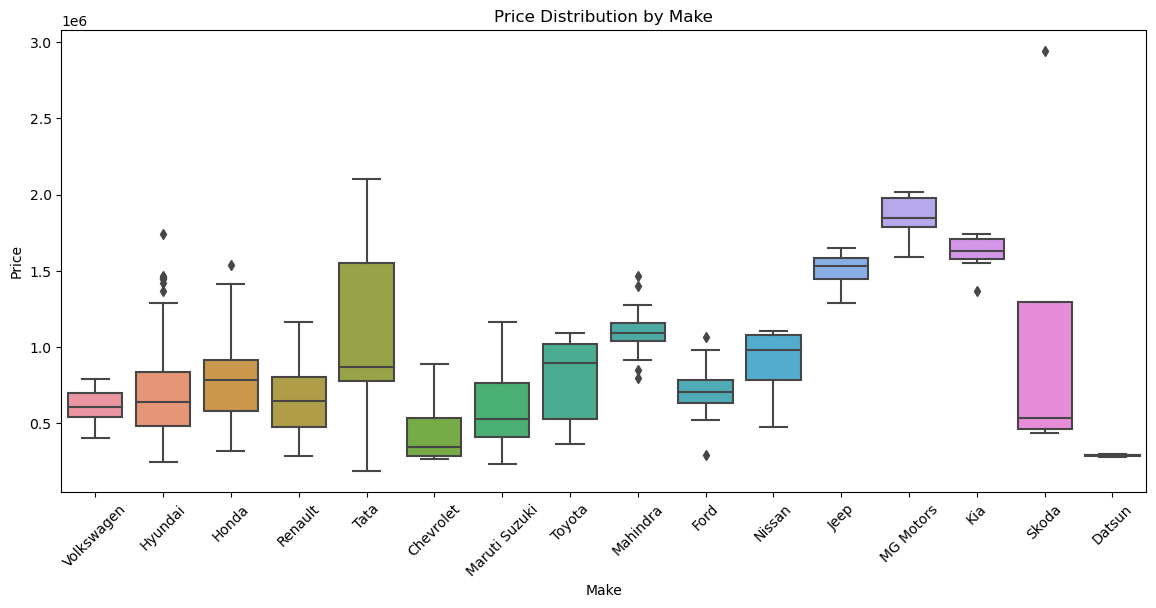

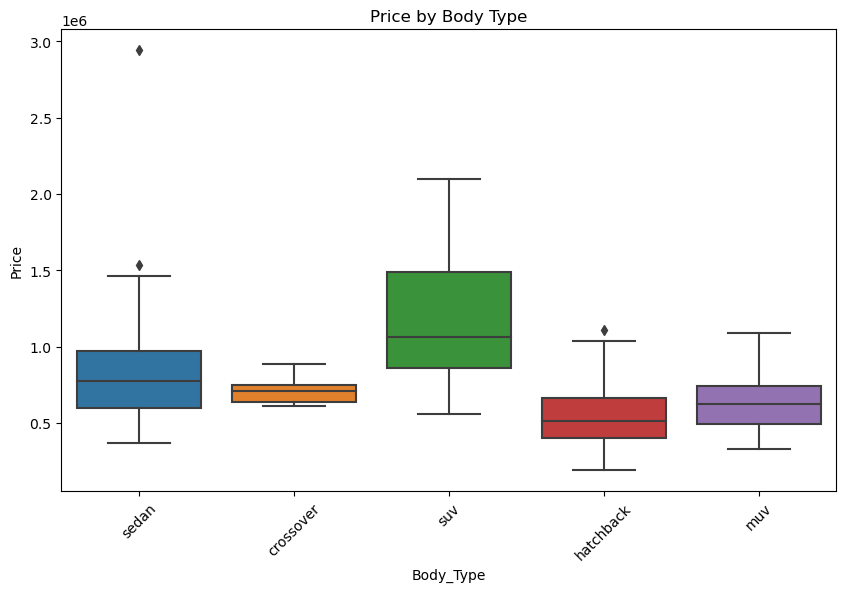

{'Make': array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
        'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
        'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object),
 'Color': array(['silver', 'red', 'white', 'bronze', 'orange', 'grey', 'blue',
        'yellow', 'beige', 'brown', 'golden', 'black', 'maroon', 'purple',
        'green'], dtype=object),
 'Body_Type': array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object),
 'No_of_Owners': array(['1st', '2nd', '3rd'], dtype=object),
 'Fuel_Type': array(['diesel', 'petrol', 'petrol+cng'], dtype=object),
 'Transmission': array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object),
 'Transmission_Type': array(['Automatic', 'Manual'], dtype=object)}

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# drop the redundant index column
data.drop(columns=['Unnamed: 0'], inplace=True)

# check for unique values in categorical columns and visual distributions of key features

# price distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Mileage_Run distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Mileage_Run'], bins=30, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage Run')
plt.ylabel('Frequency')
plt.show()

# Price by Make
plt.figure(figsize=(14, 6))
sns.boxplot(x='Make', y='Price', data=data)
plt.title('Price Distribution by Make')
plt.xticks(rotation=45)
plt.show()

# Price by Body_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body_Type', y='Price', data=data)
plt.title('Price by Body Type')
plt.xticks(rotation=45)
plt.show()

# Display unique values in categorical columns
{col: data[col].unique() for col in data.select_dtypes(include='object').columns}


In [ ]:
'''
Price and Mileage_Run show right-skewed distributions, indicating
a range of high-value vehicles and varying usage. Price by Make
and Price by Body Type plots show notable price differences acorss
car makes and body types. Categorical columns such as No_of_Owners 
(e.g., '1st', '2nd', '3rd') and Transmission types ('5-Speed', 
'6-Speed', etc.) contain multiple categories, requiring transformation 
before regression analysis.
'''

In [4]:
# encoding categorical variables with one-hot encoding
data_encoded = pd.get_dummies(data, columns=[
    'Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type',
    'Transmission', 'Transmission_Type'
], drop_first=True)

# display the first few rows of the transformed dataset
data_encoded.head()


,Make_Year,Mileage_Run,Seating_Capacity,Price,Make_Datsun,Make_Ford,Make_Honda,Make_Hyundai,Make_Jeep,Make_Kia,...,Body_Type_suv,No_of_Owners_2nd,No_of_Owners_3rd,Fuel_Type_petrol,Fuel_Type_petrol+cng,Transmission_5-Speed,Transmission_6-Speed,Transmission_7-Speed,Transmission_CVT,Transmission_Type_Manual
0,2017,44611,5,657000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2016,20305,5,682000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
2,2019,29540,5,793000,False,False,True,False,False,False,...,True,True,False,True,False,True,False,False,False,True
3,2017,35680,5,414000,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2017,25126,5,515000,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True


In [5]:
from sklearn.model_selection import train_test_split

# separate features and target variable
X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression

# initialize and train/fit a simple linear model (no transformations)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
import numpy as np

# Make predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Calculate RMSE and R^2 for both sets
rmse_train = np.sqrt(np.mean(y_train - y_train_pred) ** 2)
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(np.mean(y_test - y_test_pred) ** 2)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training RMSE: {rmse_train}, R^2: {r2_train}")
print(f"Test RMSE: {rmse_test}, R^2: {r2_test}")


Training RMSE: 5.73121584378756e-10, R^2: 0.8516619546085412
Test RMSE: 2529.0148631025636, R^2: 0.8404910169992479


In [ ]:
'''
Training RMSE is a very low number, which suggests that the
model fits the training data very well; however this can indicate
overfitting, the model might be capturing nise or overly specific
patterns in the training data. Training R^2 of 0.85 on the training
data suggests the model explains 85% of the variance in car prices
on the training set, which is a strong indication of a good fit;
however, given the near zero RMSE...
Test RMSE is very high compared to training RMSE, which indicates
that the model performs much less accurately on unseen data, sign
of overfitting. An R^2 of  of 0.84 on the test set still shows 
that the model explains 84% of the variance in car prices, so it
has predictive value on new data. However, the gap in RMSEs 
suggests that although the model captures trends in the test 
set, it may have learned some patterns too specifically from 
the training data.
'''

In [15]:
import statsmodels.api as sm

# log transform Price and Mileage
X_train['Log_Mileage_Run'] = np.log(X_train['Mileage_Run'] + 1)  # Log to avoid log(0)
y_train_log = np.log(y_train + 1)

# include interactions (Body_Type and Transmission_Type as an example)
X_train['Body_Transmission_Interaction'] = X_train['Body_Type_hatchback'] * X_train['Transmission_Type_Manual']

# convert boolean columns to integers (True -> 1, False -> 0)
X_train = X_train.astype(int)

# instantiate and fit the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_log)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.631e+04
Date:                Mon, 28 Oct 2024   Prob (F-statistic):                        0.00
Time:                        21:44:23   Log-Likelihood:                          63.697
No. Observations:                 780   AIC:                                     -33.39
Df Residuals:                     733   BIC:                                      185.6
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [13]:
# apply transformations to test data
X_test['Log_Mileage_Run'] = np.log(X_test['Mileage_Run'] + 1)
X_test['Body_Transmission_Interaction'] = X_test['Body_Type_hatchback'] * X_test['Transmission_Type_Manual']

# predict and evaluate on test data
y_test_log_pred = linear_model.predict(X_test)
rmse_test_complex = np.sqrt(np.mean((np.log(y_test + 1) - y_test_log_pred) ** 2))
r2_test_complex = r2_score(np.log(y_test + 1), y_test_log_pred)

print(f"Complex Model Test RMSE: {rmse_test_complex}, R^2: {r2_test_complex}")

Complex Model Test RMSE: 0.19140250482878082, R^2: 0.8064512013809816


In [ ]:
'''
An RMSE of approximately 0.1914 on the test set suggests that, 
on average, the model’s predictions are within about 0.19 units
of the actual (log-transformed) prices. This low RMSE generally 
indicates that the model is accurate. An R^2 value of 0.806 on 
the test set means that the model explains about 80.6% of the 
variance in car prices. This relatively high R^2 suggests that 
the complex model captures most of the variation in the data, 
and thus performs well on unseen data.
'''